In [201]:
import numpy as np
import matplotlib.pyplot as plt
import sys; sys.path.append('/home/svadarevu/gitwork/linear/library/')
import pseudo
import os
import glob
import miscUtil
import ops
%matplotlib inline

physDataDir = '/home/svadarevu/gitwork/linear/data/'
covDataDir = '/home/svadarevu/gitwork/linear/cov/'
specDataDir = '/kepler/sabarish/data/r590/FF/'
libDir = '/home/svadarevu/gitwork/linear/library/'

In [ ]:
os.chdir(libDir)
%run test_minimize.py
os.chdir(specDataDir)

In [ ]:
os.chdir()
tRange = np.arange(40000, 75000,500)
uFiles = ['uFF_it%s.dat'%t for t in tRange]
U = np.zeros(384)
for fInd in range(len(uFiles)):
    uff = miscUtil.bin2arr(uFiles[fInd])
    U += np.real(uff[0,0])
U = U/len(uFiles)
np.save('')

In [199]:
os.chdir(specDataDir)
uff = miscUtil.bin2arr('uFF_it64850.dat')
for l in range(31):
    print(np.linalg.norm(np.conj(uff[l,0]) ),np.linalg.norm(np.conj(uff[97+l,0]) ))

328.767273778 1.73873297778
1.73873297778 1.62865168555
1.62865168555 0.997196186785
0.997196186785 0.68622372687
0.68622372687 0.934848330996
0.934848330996 0.526629471472
0.526629471472 0.563877935022
0.563877935022 0.604775075867
0.604775075867 0.494426537127
0.494426537127 0.51379273557
0.51379273557 0.363222768091
0.363222768091 0.358230391286
0.358230391286 0.318638554356
0.318638554356 0.314513881751
0.314513881751 0.31386132719
0.31386132719 0.218574436911
0.218574436911 0.234717850924
0.234717850924 0.225509701691
0.225509701691 0.192271907632
0.192271907632 0.208290920539
0.208290920539 0.251735040792
0.251735040792 0.166947538399
0.166947538399 0.171820219934
0.171820219934 0.159084421533
0.159084421533 0.134606805069
0.134606805069 0.128811784243
0.128811784243 0.147635983131
0.147635983131 0.134019434651
0.134019434651 0.0918946914268
0.0918946914268 0.114731208509
0.114731208509 0.0885504004426


In [197]:
uff.shape

(193, 64, 384)

# Covariance matrices from DNS

In [132]:
# For a,b = 2,8 (or l,m=2,4 since a0,b0 = 1,2)
N = 384
covMat =np.load(covDataDir+'covR590N%dl02m04.npy'%N)
z = pseudo.chebdif(N+2,1)[0][1:-1]

In [170]:
N = 384
covMat =np.load(covDataDir+'covR590l-2m04.npy')
z = pseudo.chebdif(N+2,1)[0][1:-1]
plt.contourf(z, z,np.abs(covMat[0*N:1*N,0*N:1*N]),100,cmap=plt.get_cmap('gist_heat'))
#plt.xscale("log")#; plt.yscale("log")
#plt.clim([0., 1.0e-4])
ax = plt.gca() 
ax.set_xlim(ax.get_xlim()[::-1]) 
plt.colorbar()
plt.show()
#print(np.diag(covMat[:N,:N]))

FileNotFoundError: [Errno 2] No such file or directory: '/home/svadarevu/gitwork/linear/cov/covR590l-2m04.npy'

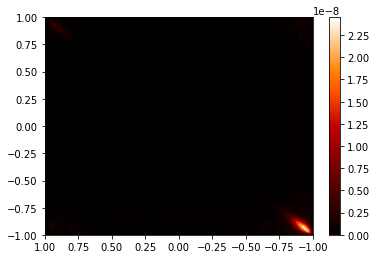

In [184]:
N = 64
covMat =np.load(covDataDir+'covR590N%dl-1m00.npy'%N)
z = pseudo.chebdif(N+2,1)[0][1:-1]
plt.contourf(z, z,np.abs(covMat[0*N:1*N,0*N:1*N]),100,cmap=plt.get_cmap('gist_heat'))
#plt.xscale("log")#; plt.yscale("log")
#plt.clim([0., 1.0e-4])
ax = plt.gca() 
ax.set_xlim(ax.get_xlim()[::-1]) 
plt.colorbar()
plt.show()
#print(np.diag(covMat[:N,:N]))

# Stat completition for turbulent channel flow

In [ ]:
# Load turbulent mean for Re=590 from DNS data
os.chdir(covDataDir)
U0 = np.load('uMean.npy')
U = np.zeros(U0.size+2)
U[1:-1] = U0

# Interpolate to a grid with N=64 (internal nodes)
N = 64
Uc = pseudo.chebcoeffs(U)
Uc = Uc[:N+2]
U = pseudo.chebcoll_vec(Uc)


# Initialize statComp instance 
a = 2.; b = 8.; l = a; m = b/2.
statInst = statComp(a=a, b=b, N=N)
# Re-assign attributes U, dU, d2U to reflect turbulent field
statInst.U = U
statInst.dU = statInst.D1 @ U
statInst.d2U = statInst.D2 @ U




# Stat completion for laminar channel flow

In [54]:
statInst = ops.statComp(N=15)

Initialized instance of 'linearize', version 3.1.
New in this version: diffmats and OSS validated for channel and BL LSA. 
Re is now a class attribute. Use the appropriate one depending on what velocity is used for scaling U,dU,d2U.
To fix: channel routines in pseudo.py to ignore wall-nodes, 
To fix: Eddy viscosity, resolvent, and svd are currently not supported.
structMat has not been supplied or is not a numpy array. Using one-point covariances for uu, and vv, as well as the Reynolds shear stresses. Ignoring ww.


/home/svadarevu/gitwork/linear/library/ops.py:379: UserWarning: Need Fourier coefficients for u,v,w from DNS for statistics completion. Have you supplied these? Using zeroes for non-supplied fields instead.
  warn("Need Fourier coefficients for u,v,w from DNS for statistics completion. Have you supplied these? Using zeroes for non-supplied fields instead.")


In [55]:
statOut = statInst.completeStats(iterMax=5000)

/home/svadarevu/gitwork/linear/library/ops.py:299: UserWarning: z,w represent wall-normal, and y,v represent spanwise.
  warn("z,w represent wall-normal, and y,v represent spanwise.")
/home/svadarevu/gitwork/linear/library/minimize.py:52: UserWarning: Be careful with array multiplication. All arrays are now matrices, so A*B is matrix multiplication, not elementwise multiplication.
  warn("Be careful with array multiplication. All arrays are now matrices, so A*B is matrix multiplication, not elementwise multiplication.")
/home/svadarevu/gitwork/linear/library/minimize.py:90: UserWarning: No Z0 supplied, using identity...
  warn("No Z0 supplied, using identity...")
/home/svadarevu/gitwork/linear/library/minimize.py:93: UserWarning: No X0 supplied, solving Lyapunov equation with Z0
  warn("No X0 supplied, solving Lyapunov equation with Z0")
/home/svadarevu/gitwork/linear/library/minimize.py:98: UserWarning: No Y10 supplied, solving adjoing Lyapunov equation
  warn("No Y10 supplied, solvin

Write decorators for timing and logging (have a look at your bookmarks on Chrome)

Starting iterations for AMA......
stepSize_BB  stepSize  tolPrimal   resPrimal  tolDual   abs(dualGap)    iter
      10  1.32e-22       1e-06     1.2e+11       1e-06       31  0
  0.0012   0.00121       1e-06         8.7       1e-06       30  100
 0.00028  0.000139       1e-06         9.4       1e-06       29  200
   0.008  0.000994       1e-06         3.5       1e-06       29  300
 0.00089  0.000893       1e-06         2.6       1e-06       29  400
  0.0013    0.0013       1e-06         2.2       1e-06       29  500
   0.042  0.000653       1e-06         5.4       1e-06       29  600
  0.0063   0.00629       1e-06        0.98       1e-06       29  700
    0.41    0.0255       1e-06        0.85       1e-06       29  800
   0.012    0.0117       1e-06        0.67       1e-06       29  900
   0.052    0.0258       1e-06        0.55       1e-06       29  1000
   0.052     0.052       1e-06        0.27      

# Plotting premultiplied energy spectra

I'll run this on Magnus with temporal averages later. For now, I'm taking one snapshot at t=74950 as a proxy for the temporal average.

In [45]:
os.chdir(physDataDir+'r590')
L = 32; M=16; N=384; Re = 590.
uuArr = miscUtil.bin2arr('uu_it74950.dat',L=32,M=16)
vvArr = miscUtil.bin2arr('vv_it74950.dat',L=32,M=16)
wwArr = miscUtil.bin2arr('ww_it74950.dat',L=32,M=16)
uvArr = miscUtil.bin2arr('uv_it74950.dat',L=32,M=16)
a = 1.; b= 2.
kxArr = a* np.concatenate( (np.arange(L+1), np.arange(-L+1,1)))
kyArr = b* np.arange(M)
lxArr = 2.*np.pi/kxArr
lyArr = 2.*np.pi/kyArr
lxpArr = Re*lxArr
lypArr = Re*lyArr
zArr = 1. - pseudo.chebdif(N,1)[0]
zpArr = Re*zArr

/home/svadarevu/linenv/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in true_divide
/home/svadarevu/linenv/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in true_divide


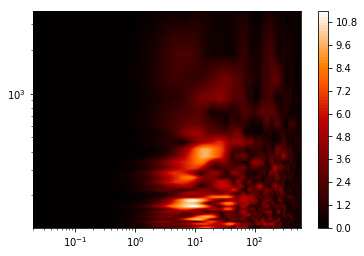

In [62]:
plt.contourf(zpArr[1:N//2], lxpArr[1:L], 
             kxArr[1:L].reshape((L-1,1))*np.abs(np.sum(uuArr[1:L,:,1:N//2],axis=1)),100,cmap=plt.get_cmap('gist_heat'))
plt.xscale("log"); plt.yscale("log")
plt.colorbar()
plt.show()

#Looks alright. There are multiple peaks, but I suppose that's to be expected for a single snapshot

# Testing phys2onePointSpec in python2

In [64]:
uuArr2 = miscUtil.bin2arr('py2/uu_it74950.dat',L=32,M=16)
vvArr2 = miscUtil.bin2arr('py2/vv_it74950.dat',L=32,M=16)
wwArr2 = miscUtil.bin2arr('py2/ww_it74950.dat',L=32,M=16)
uvArr2 = miscUtil.bin2arr('py2/uv_it74950.dat',L=32,M=16)
norm = lambda someArr: pseudo.chebnorm(someArr,N)
print("Norm diff for uu, vv, ww, uv is",
      norm(uuArr-uuArr2), norm(vvArr-vvArr2), norm(wwArr-wwArr2), norm(uvArr-uvArr2))
print("The above norms must be zero")

Norm diff for uu, vv, ww, uv is 0.0 0.0 0.0 0.0
The above norms must be zero


# Testing phys2spec

In [69]:
%timeit miscUtil.phys2spec(t=74950,L=32,M=24)

Successfully FFTd ./u_it74950.dat to ./uFF_it74950.dat
Successfully FFTd ./v_it74950.dat to ./vFF_it74950.dat
Successfully FFTd ./w_it74950.dat to ./wFF_it74950.dat
Successfully FFTd ./u_it74950.dat to ./uFF_it74950.dat
Successfully FFTd ./v_it74950.dat to ./vFF_it74950.dat
Successfully FFTd ./w_it74950.dat to ./wFF_it74950.dat
Successfully FFTd ./u_it74950.dat to ./uFF_it74950.dat
Successfully FFTd ./v_it74950.dat to ./vFF_it74950.dat
Successfully FFTd ./w_it74950.dat to ./wFF_it74950.dat
Successfully FFTd ./u_it74950.dat to ./uFF_it74950.dat
Successfully FFTd ./v_it74950.dat to ./vFF_it74950.dat
Successfully FFTd ./w_it74950.dat to ./wFF_it74950.dat
1 loop, best of 3: 4.59 s per loop


/home/svadarevu/linenv/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


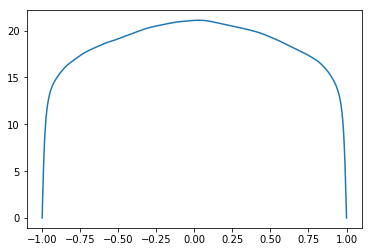

In [68]:
uArr = miscUtil.bin2arr('uFF_it74950.dat',L=32,M=24,N=384)
z = pseudo.chebdif(N,1)[0]
plt.plot(z,uArr[0,0]); plt.show()

# Timing phys2spec for Re=1000

In [71]:
os.chdir(physDataDir+'r1000')
%timeit miscUtil.phys2spec(t=100000,Nx=512,Ny=384,Nz=512,prefixes=['c'])

Successfully FFTd ./c_it100000.dat to ./cFF_it100000.dat
Successfully FFTd ./c_it100000.dat to ./cFF_it100000.dat
Successfully FFTd ./c_it100000.dat to ./cFF_it100000.dat
Successfully FFTd ./c_it100000.dat to ./cFF_it100000.dat
1 loop, best of 3: 4.8 s per loop
